# Problem Statement
    Analysis of given dataset and find major 3 insights with charts and explanation.

 # Data Info
    
    datetime - hourly date + timestamp  
    season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
    holiday - whether the day is considered a holiday
    workingday - whether the day is neither a weekend nor holiday
    weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
    temp - temperature in Celsius
    atemp - "feels like" temperature in Celsius
    humidity - relative humidity
    windspeed - wind speed
    casual - number of non-registered user rentals initiated
    registered - number of registered user rentals initiated
    count - number of total rentals

# Data Cleaning and Preprocesing

In [1]:
#installing dependencies 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading data
df = pd.read_csv('train.csv')
# df = df.sort_values('datetime', axis=0, ascending=True, inplace=False)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
print("Number of rows in data::",df.shape[0])
print("Number of features::",df.shape[1])
print("Feature names ::",df.columns.values)

Number of rows in data:: 10886
Number of features:: 12
Feature names :: ['datetime' 'season' 'holiday' 'workingday' 'weather' 'temp' 'atemp'
 'humidity' 'windspeed' 'casual' 'registered' 'count']


In [4]:
# Checking whether any of our features contains Null/missing value or not
df.isna().values.any()

False

In [5]:
# Code to find the categorical columns in the dataframe
# 10 is just hypothesis made looking at the nature of data
categorical_features = [i for i in df.columns if len(df[i].value_counts().values)<10]
categorical_features

['season', 'holiday', 'workingday', 'weather']

In [6]:
#Removing the categorical features and printing the descriptive information of numerical data
df.drop(categorical_features,axis=1).describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000



Here looking at the 75 percentile and max of features "windspeed", "casual", "registered" and "count" indicate that there is is possibility of outliers in our dataset.

In [7]:
#since "count" feature is summation of "casual" and "registered" features , so checking it holds true or not 
all(np.where((df['casual']+ df['registered'])== df['count'],True,False))

True

There is no missing data in the given dataset. There are 12 features out of which 4 are categorical features. From above descriptive info there is possibility of outliers is some features.

# Exploratory Data Analysis

## Plot between holiday and (count,casual and registered users)

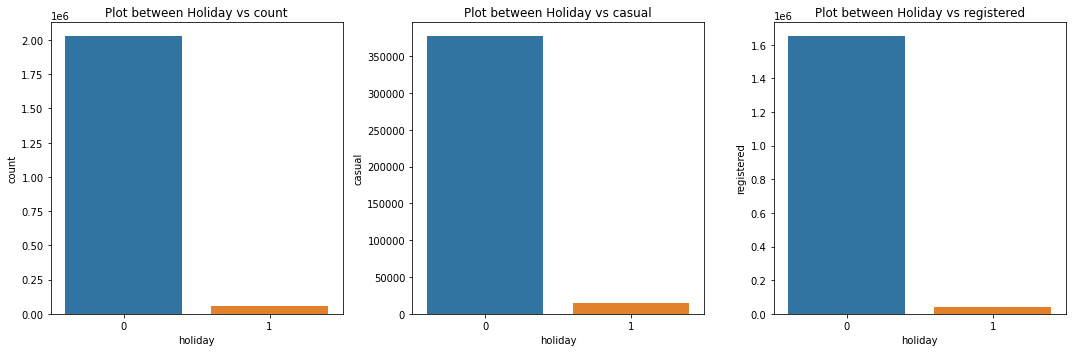

In [120]:
holiday_group = df.groupby(df['holiday'],as_index=False).sum()

fig, axs = plt.subplots(ncols=3,figsize=(15,5))
for i,feat in enumerate(['count','casual','registered']):
    sns.barplot(holiday_group['holiday'],holiday_group[feat],data=holiday_group,ax=axs[i])
    axs[i].set_title("Plot between Holiday vs " + feat)
fig.tight_layout()

Here from this chart we can see that there are very few users renting bike in holiday. So it might be many users were renting bike to reach office or for work purposes. Since there are less number of holidays, so number of high users in other day is not suprising fact but the difference in ratio of count and holiday is very big. So, most of the users might be renting bike for work related purposes.

## Plot between workingday and (count,casual and registered users)

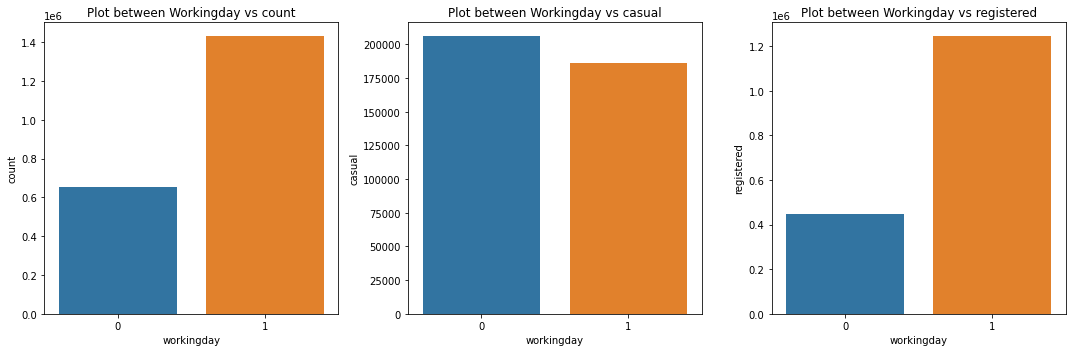

In [119]:
workingday_group = df.groupby(df['workingday'],as_index=False).sum()

fig, axs = plt.subplots(ncols=3,figsize=(15,5))
for i,feat in enumerate(['count','casual','registered']):
    sns.barplot(workingday_group['workingday'],workingday_group[feat],data=workingday_group,ax=axs[i])
    axs[i].set_title("Plot between Workingday vs " + feat)
fig.tight_layout()

From this chart, we can see that 
> "casual users" are renting bike in non-workingday(0) is little higher or almost similar as workingday(1). Although workingday(1) has more number of days.

> Most of "registered users" are renting bike in workingday(1) and only few are renting in non-workingday(0).

So most of "registered users" might be renting bike for work purposes(like reaching to office) where as "casual users" might be more interested in renting bike in weekends.

## Plot between weather and (count,casual and registered users)

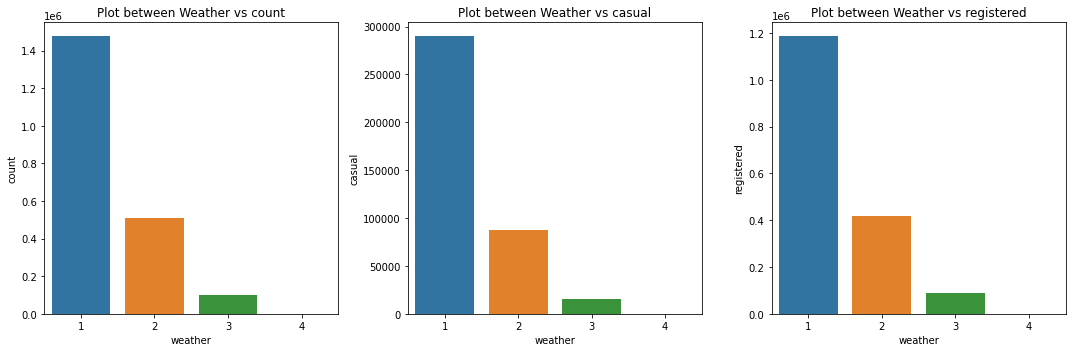

In [73]:
weather_group = df.groupby(df['weather'],as_index=False).sum()[['weather','casual','registered','count']]

fig, axs = plt.subplots(ncols=3,figsize=(15,5))
for i,feat in enumerate(['count','casual','registered']):
    sns.barplot(weather_group['weather'],weather_group[feat],data=weather_group,ax=axs[i])
    axs[i].set_title("Plot between Weather vs " + feat)

fig.tight_layout()


From above chart we can see that most of the users prefer renting bikes in the weather 1(Clear, Few clouds) than other weather conditions.

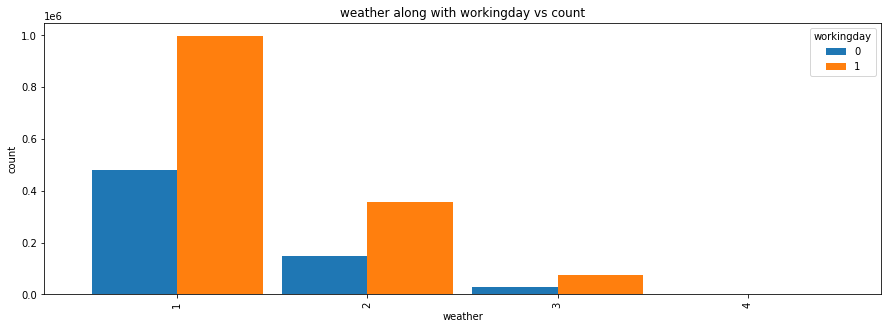

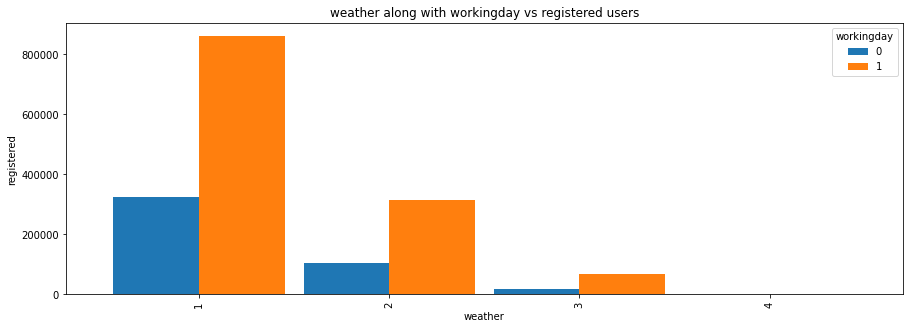

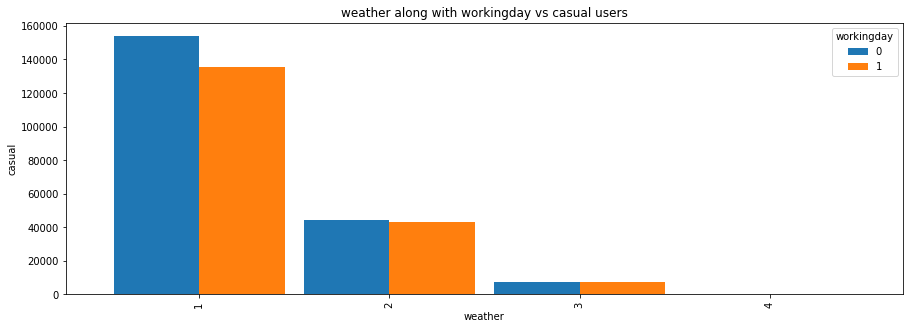

In [8]:
def chart_for_weather(addi_feat,keep_feat,title):
    tempo = df.groupby(['weather', addi_feat])[keep_feat].sum().unstack()
    tempo.plot(kind='bar', figsize=(15,5), width=0.9, title=title)
    plt.ylabel(keep_feat)
chart_for_weather('workingday','count','weather along with workingday vs count')
chart_for_weather('workingday','registered','weather along with workingday vs registered users')
chart_for_weather('workingday','casual','weather along with workingday vs casual users')

From this plot too we can see weather 1(clear,few clouds) has more number of renting but "registered users" tends to rent bikes more in weather 1 and in workingday(1) while "casual users" are most tend to rent bike in weather 1 and non-workingday(0).

## Plot between season and (count,casual and registered users)

In [4]:
season_group = df.groupby(df['season'],as_index=False).sum()[['season','casual','registered','count']]
season_group

,season,casual,registered,count
0,1,41605,270893,312498
1,2,129672,458610,588282
2,3,142718,497944,640662
3,4,78140,465894,544034


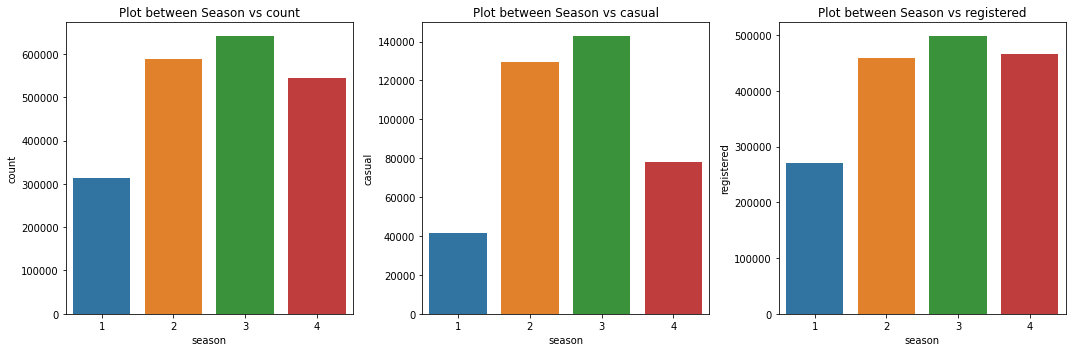

In [5]:
fig, axs = plt.subplots(ncols=3,figsize=(15,5))
for i,feat in enumerate(['count','casual','registered']):
    sns.barplot(season_group['season'],season_group[feat],data=season_group,ax=axs[i])
    axs[i].set_title("Plot between Season vs " + feat)
fig.tight_layout()

Here we can observe that season 3(summer) and 2(spring) has highest number of rentals among casual and registered user where as season 1(winter) has the least number of customer. And the number of registered user renting bike is significantly higher than of causal user.

In [6]:
print("In season 3(summer), the number of registered user renting bike is {:.2f}% higher than of causal user" .format(((season_group.iloc[2]['registered'] - season_group.iloc[2]['casual'])/season_group.iloc[2]['count'])*100,2))

In season 3(summer), the number of registered user renting bike is 55.45% higher than of causal user


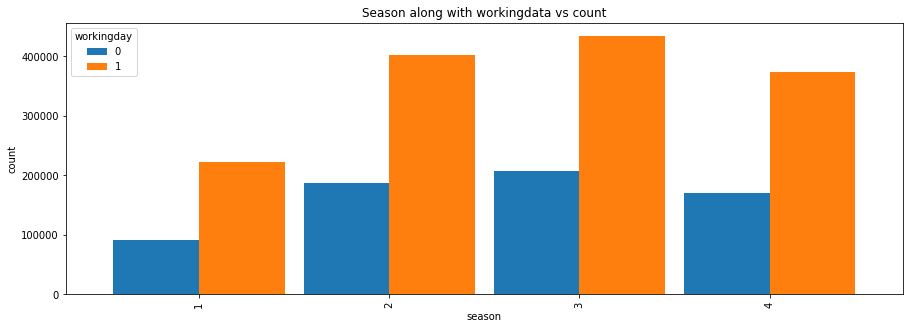

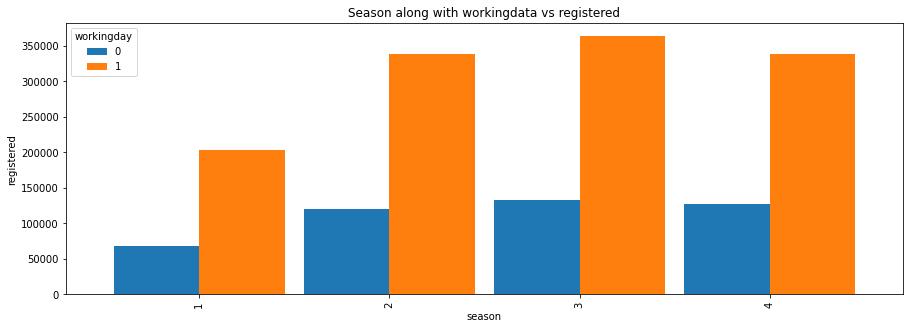

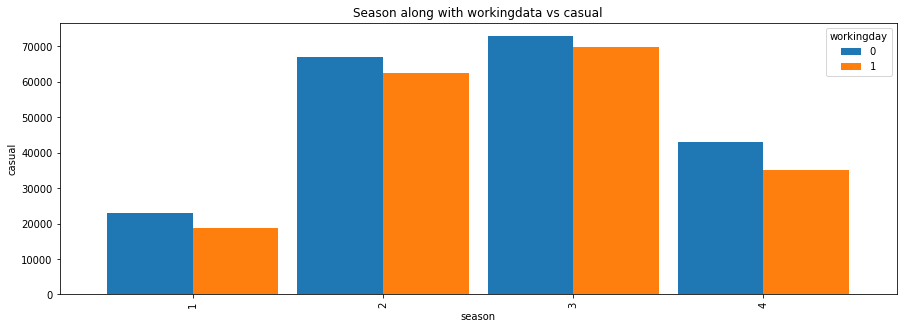

In [6]:
def chart_for_season(addi_feat,keep_feat,title):
    tempo = df.groupby(['season', addi_feat])[keep_feat].sum().unstack()
    tempo.plot(kind='bar', figsize=(15,5), width=0.9, title=title)
    plt.ylabel(keep_feat)
chart_for_season('workingday','count','Season along with workingdata vs count')
chart_for_season('workingday','registered','Season along with workingdata vs registered')
chart_for_season('workingday','casual','Season along with workingdata vs casual')

In this plot too, Season 2 and 3 are more preferred by customers. Most "registered users" tends to rent bike more in workingday(1) and season 2 or 3  while most "casual users" tends to rent bike in non-workingday(0) and season 2 or 3

## Plot between month and (count,casual and registered users)

In [4]:
#converting into datetime object
df.datetime = pd.to_datetime(df['datetime'], format='%Y/%m/%d %H:%M:%S')

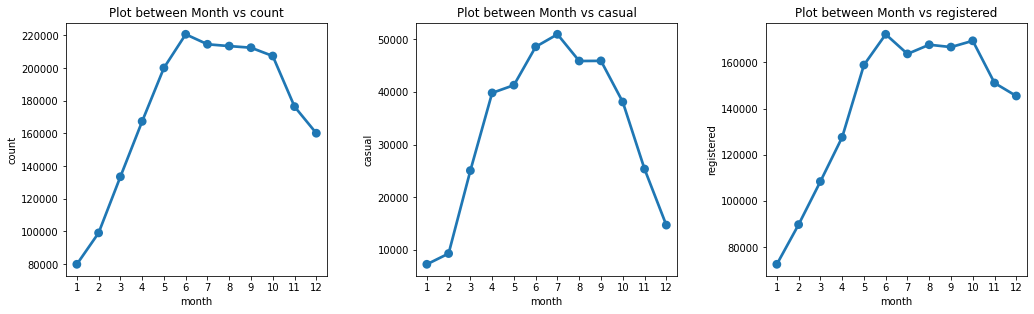

In [20]:
#grouping the data on the baisis of month
month_group = df.groupby([df['datetime'].dt.month]).sum()
month_group = month_group.reset_index()
fig, axs = plt.subplots(ncols=3,figsize=(15,5))
for i,feat in enumerate(['count','casual','registered']):
    sns.pointplot(month_group['datetime'],month_group[feat],data=month_group,ax=axs[i])
    axs[i].set_xlabel('month')
    axs[i].set_title("Plot between Month vs " + feat)

fig.tight_layout(pad=3)

Here from this plot we can observe that 6th(June) and 7th(July) month has higher number users renting bike than other months.

## Plot between hour and (count,casual and registered users)

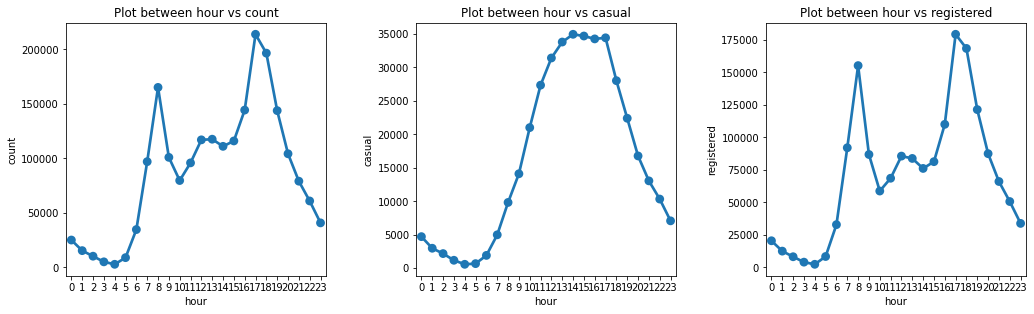

In [127]:
hour_group = df.groupby([df['datetime'].dt.hour]).sum()
hour_group = hour_group.reset_index()

fig, axs = plt.subplots(ncols=3,figsize=(15,5))
for i,feat in enumerate(['count','casual','registered']):
    sns.pointplot(hour_group['datetime'],hour_group[feat],data=hour_group,ax=axs[i])
    axs[i].set_xlabel('hour')
    axs[i].set_title("Plot between hour vs " + feat)

fig.tight_layout(pad=3)

From this graph, it looks like in "hour vs count" 18th(6pm) and 19th(7pm) hour has more number of users renting bike but in the plot between "hour vs casual" it is little unclear. So lets divide the 24hour into 6 part of 4 hour interval each.

## Plot between 4 hour interval and (count,casual and registered users)

In [23]:
temporary = df.set_index('datetime').groupby(pd.Grouper(freq='4H')).sum()
temporary = temporary.reset_index()

df_4_hour = temporary.groupby(temporary['datetime'].dt.hour).sum()
df_4_hour = df_4_hour.reset_index()
df_4_hour

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,0,4512,51,1213,2519,33363.34,39435.685,125508,18540.5951,10969,44841,55810
1,4,4539,52,1227,2607,31979.18,37876.650,132263,18982.6611,8070,135363,143433
2,8,4556,52,1240,2652,36128.38,42297.015,114786,23846.5730,72195,369299,441494
3,12,4560,52,1244,2594,41551.04,48015.780,90933,28010.4287,134752,326737,461489
4,16,4560,52,1244,2547,40695.78,47019.625,94853,28040.3777,119014,579248,698262
5,20,4560,52,1244,2522,36515.42,42864.490,115353,21913.5828,47135,237853,284988


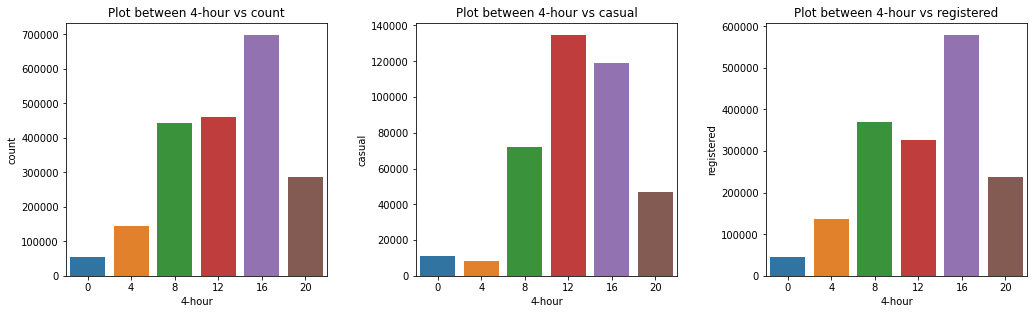

In [24]:
fig, axs = plt.subplots(ncols=3,figsize=(15,5))
for i,feat in enumerate(['count','casual','registered']):
    sns.barplot(df_4_hour['datetime'],df_4_hour[feat],data=df_4_hour,ax=axs[i])
    axs[i].set_xlabel('4-hour')
    axs[i].set_title("Plot between 4-hour vs " + feat)

fig.tight_layout(pad=3)

# 0 refers 12am to 4 am
# 4 refers 4am to 8am
# 8 refers 8am to 12 pm
# 12 refers 12pm to 4pm
# 16 refers 4pm to 8pm
# 20 refers 8pm to 12am

In this plot we can see that, ,most "registered users" rents bike in 16th hour(4pm to 8pm) while many "casual users" rents bike in 16th (4pm to 8pm) and 12th(12pm to 4pm) hour. Overall, most users rents bike in 16th hour(4pm to 8pm) .

# Plot between year and (count,casual and registered users)

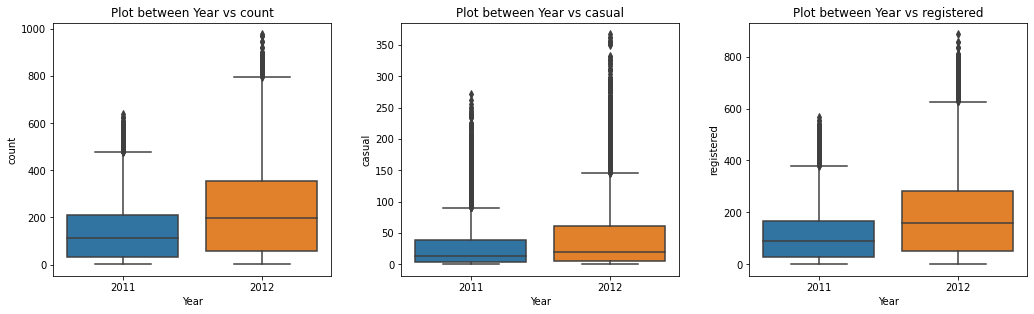

In [84]:
fig, axs = plt.subplots(ncols=3,figsize=(15,5))
for i,feat in enumerate(['count','casual','registered']):
    sns.boxplot(df['datetime'].dt.year,df[feat],ax=axs[i])
    axs[i].set_xlabel('Year')
    axs[i].set_title("Plot between Year vs " + feat)
    
fig.tight_layout(pad=3)

From this plot we can observe, number of user renting bike is significantly higher in 2012 than 2011 especially with "registered users".

# Plot between temperature and (count,casual and registered users)

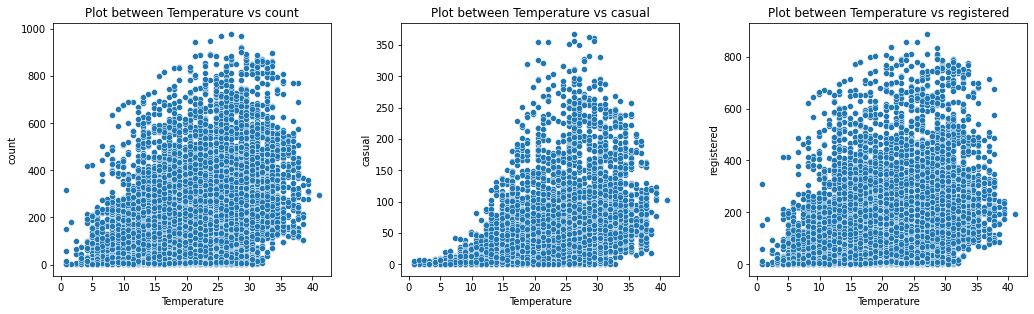

In [37]:
fig, axs = plt.subplots(ncols=3,figsize=(15,5))
for i,feat in enumerate(['count','casual','registered']):
    sns.scatterplot(df['temp'],feat,data=df,ax=axs[i])
    axs[i].set_xlabel("Temperature")
    axs[i].set_title("Plot between Temperature vs " + feat)
    
fig.tight_layout(pad=3)

Looks like there is some positive relation between temperature and count but there is not directly huge influential of temperatur on number of rents of bike 

# Plot between windspeed and (count,casual and registered users)

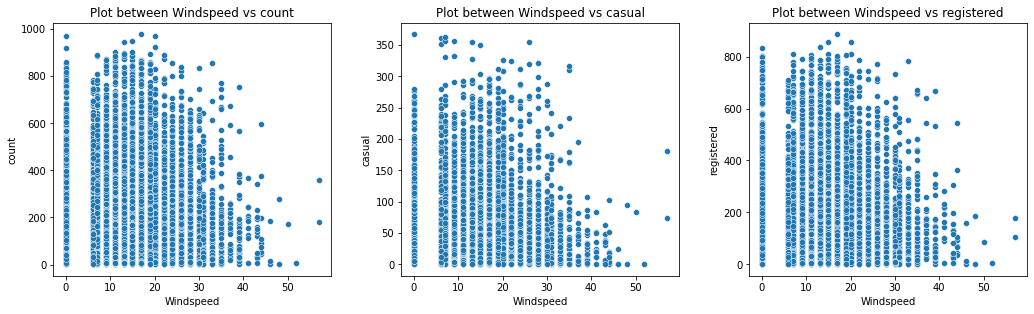

In [36]:

fig, axs = plt.subplots(ncols=3,figsize=(15,5))
for i,feat in enumerate(['count','casual','registered']):
    sns.scatterplot(df['windspeed'],feat,data=df,ax=axs[i])
    axs[i].set_xlabel("Windspeed")
    axs[i].set_title("Plot between Windspeed vs " + feat)
    
fig.tight_layout(pad=3)

Does not look like there is some relationship between windspeed and (count,casual and registered users).

# Plot between humidity and (count,casual and registered users)

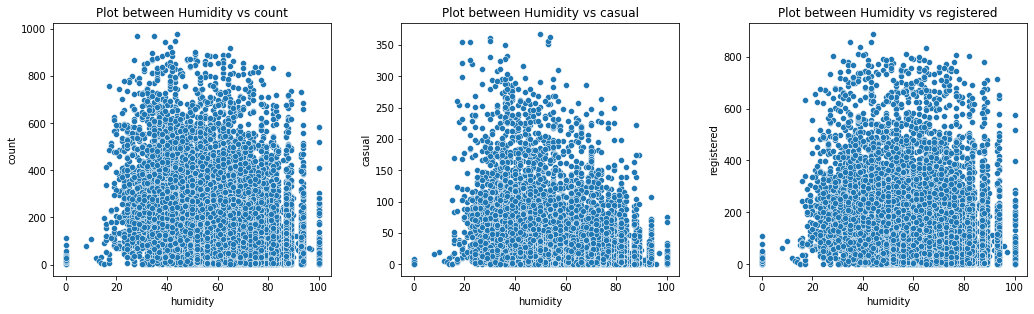

In [38]:
fig, axs = plt.subplots(ncols=3,figsize=(15,5))
for i,feat in enumerate(['count','casual','registered']):
    sns.scatterplot(df['humidity'],feat,data=df,ax=axs[i])
    axs[i].set_xlabel('humidity')
    axs[i].set_title("Plot between Humidity vs " + feat)
    
fig.tight_layout(pad=3)

In this plot also it doesnot looks like there is any relationship between humidity and (count,casual and registered users).

# Correlation between numerical features

Text(0.5, 1.0, 'Correlation matrix of numerical features')

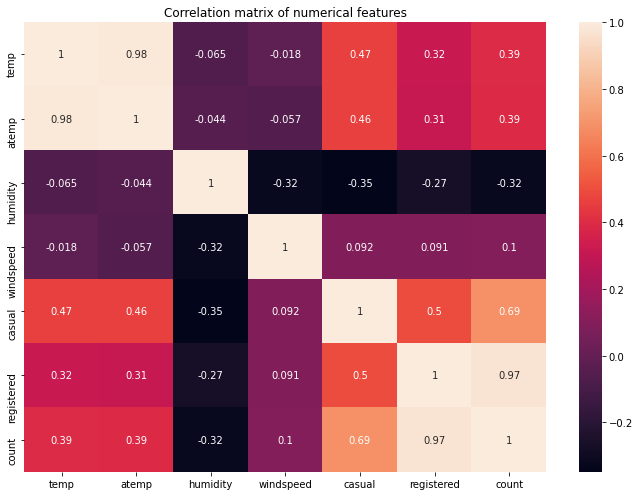

In [40]:
# making chart bigger
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

#Correlation matrix of numerical features
correlation_mat = df.drop(['datetime','season','holiday','weather','workingday'],axis=1).corr()
sns.heatmap(correlation_mat, annot = True)
plt.title("Correlation matrix of numerical features")

From this chart we can see that:
> atemp and temp are highly correlated, so we can remove the one feature.

> there is some positive correlation(39%) between temp and count feature.

> there is very little(10%) relationship between windspeed and count feature.

> there is some negative correlation(-32%) between humidity and count feature.

# Conclusion

> 1. Most of the "Registered users" tends to rent the bike in workingday while silghtly more "Casual users" tends to rent bike in non-working day. Overall most of the users rent bike in workingday. Maybe most users use bike to for office related works.  [Plot between workingday and (count,casual and registered users)](#Plot-between-workingday-and-(count,casual-and-registered-users))

> 2. Month 6th(June) to 9th(September) had more number of users renting bikes which is same as saying season 3(summer) has more number of users.If one month has to be chosen then it will be 6th(June) which has highest number of customers renting bikes. [Plot between month and (count,casual and registered users)](#Plot-between-month-and-(count,casual-and-registered-users))  [Plot between season and (count,casual and registered users)](#Plot-between-season-and-(count,casual-and-registered-users))

> 3. Overall peak timing of the day where many users rent bike is 4pm to 8pm while slightly peak timing for only "casual users" is 12pm to 4pm but not with huge margin. [Plot between 4 hour interval and (count,casual and registered users)](#Plot-between-4-hour-interval-and-(count,casual-and-registered-users))

> 4. Year 2012 had more number of users renting bike than year 2011. Especially more number of users were increased in "Registered users". It can be due to various reasons like opening more branches,bikes and people got more familiar with this service. [Plot between year and (count,casual and registered users)](#Plot-between-year-and-(count,casual-and-registered-users))



# Additional hypothetical analysis

# Outliers in features

In [51]:
print("The mean count of users renting bikes is {:.2f}".format(df['count'].mean()))
print("The max count of users renting bikes is {:.2f}".format(df['count'].max()))

The mean count of users renting bikes is 191.57
The max count of users renting bikes is 977.00


In [85]:
print("The 90th percentile value of count feature is:",np.percentile(df['count'],90))

The 90th percentile value of count feature is: 452.0


In [87]:
#Taking count value above 452 
df_outliers = df[df['count']>= 452]

In [88]:
df_outliers.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,2.764599,0.025547,0.682482,1.264599,25.488084,29.284224,52.218066,14.069584,109.986314,481.914234,591.900547
std,0.906227,0.157853,0.465723,0.501383,6.228267,6.573624,17.327437,7.833005,84.306891,141.905416,115.811681
min,1.000000,0.000000,0.000000,1.000000,6.560000,9.090000,17.000000,0.000000,3.000000,208.000000,452.000000
25%,2.000000,0.000000,0.000000,1.000000,21.320000,25.000000,39.000000,8.998100,40.000000,365.000000,497.000000
50%,3.000000,0.000000,1.000000,1.000000,26.240000,31.060000,50.000000,12.998000,85.000000,463.000000,563.000000
75%,3.000000,0.000000,1.000000,1.000000,30.340000,33.335000,65.000000,19.001200,175.000000,578.250000,661.250000
max,4.000000,1.000000,1.000000,3.000000,37.720000,42.425000,100.000000,43.998900,367.000000,886.000000,977.000000


# Hypothetical favourable condition for having higher number of average count

Looking from above chart , taking interval values of various features by first quartile(25%) and third quartile(75%).

Taking season 2 and 3 only from season feature as these seasons has most renting of bikes.

Humidity value is taken range from 30 to 50 as it was the average humidity in real world.

hypothesis condition 

* temperature  = 21 to 30
* humidity     = 30 to 50 (average humidity found from google)
* windspeed    = 8 to 17
* holiday      = 0
* workingday   = 0 or 1
* weather      = 1
* season       = 2 or 3

In [108]:
df_high_count = df[(df['temp']>=21) & (df['temp']<=30) & (df['humidity']>=30) & (df['humidity']<=50) & (df['windspeed']>=8)
  & (df['windspeed']<=17) & (df['holiday']==0) & (df['weather']==1) 
   & ((df['season']== 2) | (df['season']== 3))]

df_high_count.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
1645,2011-04-14 11:00:00,2,0,1,1,21.32,25.000,45,11.0014,28,87,115
1646,2011-04-14 12:00:00,2,0,1,1,22.14,25.760,42,8.9981,35,110,145
1647,2011-04-14 13:00:00,2,0,1,1,22.96,26.515,37,15.0013,38,121,159
1726,2011-04-17 20:00:00,2,0,0,1,21.32,25.000,36,12.9980,44,97,141
1749,2011-04-18 19:00:00,2,0,1,1,22.96,26.515,46,16.9979,42,244,286


In [112]:
# this is just only hypothesis
print("If above conditions met then the prediction of count can be on average : {:.0f}".format(df_high_count['count'].median()))

If above conditions met then the prediction of count can be on average : 340
